In [9]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### This chapter is about network graphs and trying to cluster using Network Graphs. Going to follow along in the book as best as I can using custom python and algorithms from the networkx library

### Starting with the friends dataset

In [38]:
excel_file_obj = pd.ExcelFile("../raw_data/FriendsGraph.xlsx")
# Information on the type of offers
friends_df = pd.read_excel(excel_file_obj, "FriendsGraph", index_col=0).fillna(0)
#del friends_df["Unnamed: 0"]

In [39]:
friends_df.head(6)

,Ross,Rachel,Chandler,Monica,Joey,Phoebe
Ross,0.0,1.0,0.0,0.0,0.0,0.0
Rachel,1.0,0.0,1.0,0.0,1.0,0.0
Chandler,0.0,1.0,0.0,1.0,0.0,1.0
Monica,0.0,0.0,1.0,0.0,0.0,0.0
Joey,0.0,1.0,0.0,0.0,0.0,0.0
Phoebe,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
labels_dict = {i: friends_df.columns[i] for i in range(len(friends_df.columns))}

In [40]:
friends_adjacency_matrix = friends_df.to_numpy()

In [41]:
friends_adjacency_matrix

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

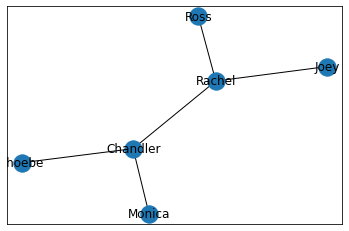

In [47]:
friends_graph = nx.from_numpy_matrix(friends_adjacency_matrix)
nx.draw_networkx(friends_graph, labels=labels_dict)
plt.show()

### Building a graph from the Wine Data-set

In [51]:
network_wine = pd.read_excel(
    pd.ExcelFile("../raw_data/WineNetwork.xlsx"), 
    "Matrix", 
    index_col=0).fillna(0)

In [55]:
network_wine.head()

,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Adams,Allen,Anderson,Bailey,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
Offer #,,,,,,,,,,,,,,,,,,,,,
1,January,Malbec,72,56,France,False,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,January,Pinot Noir,72,17,France,False,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,February,Espumante,144,32,Oregon,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,February,Champagne,72,48,France,True,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,February,Cabernet Sauvignon,144,44,New Zealand,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
order_info = network_wine.loc[:, network_wine.columns[0:6]]
order_info.head()

,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
Offer #,,,,,,
1,January,Malbec,72,56,France,False
2,January,Pinot Noir,72,17,France,False
3,February,Espumante,144,32,Oregon,True
4,February,Champagne,72,48,France,True
5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [106]:
people = network_wine.loc[:, network_wine.columns[6:]]
people.head(32)

,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,Brown,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
Offer #,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
cos_similiar(people["Adams"], people["Allen"])

0.0

In [73]:
def cos_similiar(vector_a, vector_b):
    return np.dot(vector_a, vector_b) / (np.linalg.norm(vector_a) * np.linalg.norm(vector_b))


In [74]:
adj_matrix = np.ndarray(shape=(100, 100))

In [96]:
vector_i = np.empty(shape=(100, 1))
vector_i[32] = 1

In [113]:
adj_matrix = np.ndarray(shape=(100, 100))
for i in range(n_people):
    vector_i = np.empty(shape=(100))
    for j in range(n_people):
        if i == j:
            sim_i_j = 0
        else:
            ith_customer = people.iloc[:, i].to_numpy()
            jth_customer = people.iloc[:, j].to_numpy()
            sim_i_j = cos_similiar(ith_customer, jth_customer)     
        vector_i[j] = sim_i_j
    adj_matrix[:, i] = vector_i

### What if we just used this as our graph looking at cosine similiarty

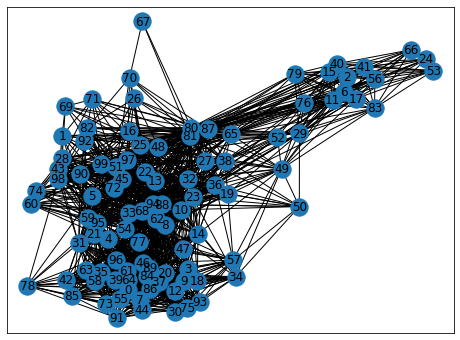

In [118]:
plt.figure(num=None, figsize=(8, 6))
wine_graph = nx.from_numpy_matrix(adj_matrix)
nx.draw_networkx(wine_graph)
plt.show()

### Way too complicated - tough to derive insights, so going to prune

Two popular methods

1. r-neighborhood graph - only keep edges of a certain strength
2. knn - only keep a set  number of edges out out of each node

For this book we will be doing r-neighborhood

0.5773502691896258


(array([7050.,  194.,  960.,  582.,  658.,  134.,  102.,  192.,  100.,
          28.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

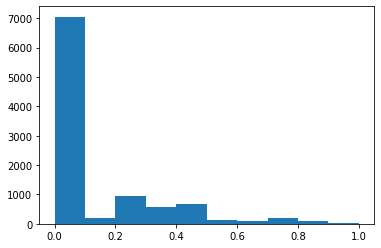

In [123]:
edge_weights = adj_matrix.flatten()
print(np.percentile(edge_weights, 95))
plt.hist(edge_weights)

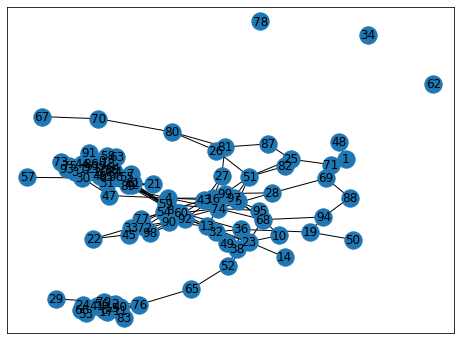

In [130]:
# Will pick 0.5, and set to 0 anything's not
adj_matrix_strong = np.where(adj_matrix < 0.5, 0, adj_matrix)
plt.figure(num=None, figsize=(8, 6))
wine_graph_strong = nx.from_numpy_matrix(adj_matrix_strong)
nx.draw_networkx(wine_graph_strong)
plt.show()

### But now we try to put customers into "community", we juse modularity maximization in order to do so

Technique assigns scores to each pair of nodes, if two nodes aren't connected, there should be a penalty for putting them in the community. If they are connected, I need to be rewarded

So it's ultimately a maximization problem where you try to come up with assignments that maximizes these scores

Scoring in detail:

1 pt if cluster two nodes that share an edge in the adjacency matrix
0 points every time you cluster nodes that do not

Penalties in Detail:

If you had this graph and you erased the middle of each edge and re-drew it a bunch of times, what is expected number of edges you would get between two nodes.

So take the friends graph, 
so 2 * the number of edges = equal number of stubs since cutting an edge in half generates two stubs

To get expected number of edges between two nodes use expected value formula

Expected Number of Edges = 1 edge * P (1 edge) + 0 edge * P(0 edge) + 2 edge * P(2 edge) + ...
but we know that in graphs (just one edge)

so simplifies to

Expected Number of Edges = 1 edge * P (1 edge) + 0 edge * P(0 edge)

which simplifies to

Expected Number of Edges = P(1 edge)

Take Ross and Rachel

P (1 edge) = 

5 * (1/10) * [(1/10 * 3] * 2


Why is that correct:
Well you have 5 edges to draw randomly, so 5 chances to connect Ross + Rachel
On each try, you have a 1/10 chance of picking the Ross edge and (3/10) chance of picking
Rachel Edge. Since you could pick in either direction (first Ross and connec to Rachel and vice versa)
you have ot multiply by 2

so you get = .3

Generalizing it

 Number of Edges * (Stubs Node A / Total Stubs) * (Stubs Node B / Total Stubs) *2

Number of Stubs * (Stubs Node A / Total Stubs) * (Stubs Node B / Total Stubs)

Stub Nodes A * (Stubs Node B / Total Stubs)

(Stub nodes A * Stub Nodes B) / Total Stubs

This it penalty

Why does this make sense:

It helps modulate the score, if two nodes were likely to be attached anyway we shouldn't get a ton of credit
for putting them in the same community, but more weight if two nodes connected and they are more sparse nodes.

So Scoring (Using Friend's graph)

If you put Ross + Rachel in same community, you would get 1  point since they have an edge but you would lose 0.3 since that is expected number of edges even if connected randomly so you would get 0.7 points

If you didn't cluster them, you would get 0 points

If you clustered Rachel + Phoebe , you would get 0 points (no edges) but penalized 0.3

If you didn't cluster you would get 0 points,

so basically penalties kick in when you cluster nodes together

Modularity of a communisty assignment = sum of points and pentalties for pairs of nodes in the same community (cluster) / total number of stubs in the graph

Maximum Score is 1 since total stubs > score

This allows you to compare different graphs and their community assignments

## I am now going to use a python library but helpful to follow along in the spreadsheet

In [135]:
# Basically in spreadsheet, he starts with no communities then progressively splits 
# until you stop increasing modularity
# Here this algo will start with n communities where n is the number of nodes and gradually combine as long as
# modularity increases
from networkx.algorithms.community import greedy_modularity_communities
node_partitions = greedy_modularity_communities(wine_graph_strong)

In [139]:
# Can check modularity of the graph and other metrics in this library
nx.algorithms.community.quality.modularity(wine_graph_strong, node_partitions)

0.5720766086263973